In [1]:
import json
import networkx as nx
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from csv import reader
import numpy as np
import pandas as pd
import plotly.offline as py
import networkx as nx
import random
from mpl_toolkits.mplot3d import Axes3D


Definisco i nodi

In [2]:

def load_nodes(path_nodes='graph_nodes.csv'):
    lista_nodi = dict()
    with open(path_nodes, 'r') as read_obj:
        csv_reader = reader(read_obj)
        header = next(csv_reader)
        # Check file as empty
        if header is not None:
            # Iterate over each row after the header in the csv
            for row in csv_reader:
                # row variable is a list that represents a row in csv
                lista_nodi[row[0]] = row[1]

    print("Numero nodi da rappresentare")
    print(len(lista_nodi))
    return lista_nodi

lista_nodi = load_nodes()
lista_nodi

Numero nodi da rappresentare
43


{'1': 'King Harald Fair-Hair',
 '2': 'Halfdan the Black',
 '3': 'Gudrod the Hunting King',
 '4': 'Halfdan the Mild and Meal-stingy',
 '5': 'Eystein Fart',
 '6': 'Olaf Wood-carver',
 '7': 'Hallfred',
 '8': 'Wife of Hallfred',
 '9': 'Hrafnkel',
 '10': 'Arnthrud',
 '11': 'man',
 '12': 'Oddbjorg Skjoldalfsdottir',
 '13': 'Thorir',
 '14': 'Asbjorn',
 '15': 'Frey',
 '16': 'Bjarni',
 '17': "Bjarni's wife",
 '18': 'Sam',
 '19': 'Eyvind',
 '20': "Sam's wife",
 '21': 'king of Greeks',
 '22': 'Freyfaxi',
 '23': 'Thorbjorn',
 '24': 'Einar',
 '25': 'shepherds',
 '26': 'mealtime servant',
 '27': 'milking women',
 '28': 'new shepherd',
 '29': 'Thorkel',
 '30': 'Thjostar',
 '31': 'Thorgeir',
 '32': 'Thormod',
 '33': 'Thordis',
 '34': 'Thorolf Skallagrimson',
 '35': "Eyvind's servant boy",
 '36': 'Servant woman',
 '37': 'Sighvat',
 '38': 'Snorri',
 '39': 'Hallstein',
 '40': 'Hrolf',
 '41': 'Thord ',
 '42': 'Halli',
 '43': 'Housekeeper'}

Carico gli archi

In [3]:
def load_edges(path_edges="graph.json"):
    with open(path_edges) as json_file:
        graph = json.load(json_file)

    lista_archi = dict()
    for arco in graph["links"]:
        lista_archi[(arco["source"], arco["target"], int(arco["action"]))] = arco["action_description"]

    print("Archi da rappresentare")
    print(len(lista_archi))
    return lista_archi


lista_archi = load_edges()
lista_archi

Archi da rappresentare
96


{('1', '2', 1): 'descent',
 ('2', '3', 1): 'descent',
 ('3', '4', 1): 'descent',
 ('4', '5', 1): 'descent',
 ('5', '6', 1): 'descent',
 ('7', '9', 9): 'offer assistance',
 ('8', '7', 2): 'marriage',
 ('9', '7', 1): 'descent',
 ('9', '7', 8): 'request assistance',
 ('9', '8', 1): 'descent',
 ('9', '9', 24): 'death_neutral',
 ('9', '13', 5): 'inheritance',
 ('9', '14', 5): 'inheritance',
 ('9', '15', 9): 'offer assistance',
 ('9', '18', 7): 'placed in command',
 ('9', '18', 20): 'challenge',
 ('9', '18', 23): 'conversation_neutral',
 ('9', '19', 21): 'hostility_non-lethal',
 ('9', '19', 22): 'hostility_lethal',
 ('9', '22', 10): 'provide information',
 ('9', '22', 28): 'ownership',
 ('9', '23', 19): 'intervention',
 ('9', '24', 24): 'death_neutral',
 ('9', '24', 22): 'hostility_lethal',
 ('9', '24', 14): 'accusation',
 ('9', '26', 8): 'request assistance',
 ('9', '29', 8): 'request assistance',
 ('9', '37', 15): 'summons',
 ('9', '38', 15): 'summons',
 ('9', '41', 15): 'summons',
 ('9', 

In [4]:
Num_nodes = 43

def load_nodes_label(path_nodes="graph.json"):
    graph = None
    with open(path_nodes) as json_file:
        graph = json.load(json_file)

    node_labels = dict()
    for node in graph["nodes"]:
        node_labels[(node['id'])] = node['label']

    print("Numero di label dei nodi da rappresentare")
    print(len(node_labels))

    return node_labels

lista_label = load_nodes_label()

lista_label

Numero di label dei nodi da rappresentare
43


{'1': 'King Harald Fair-Hair',
 '2': 'Halfdan the Black',
 '3': 'Gudrod the Hunting King',
 '4': 'Halfdan the Mild and Meal-stingy',
 '5': 'Eystein Fart',
 '6': 'Olaf Wood-carver',
 '7': 'Hallfred',
 '8': 'Wife of Hallfred',
 '9': 'Hrafnkel',
 '10': 'Arnthrud',
 '11': 'man',
 '12': 'Oddbjorg Skjoldalfsdottir',
 '13': 'Thorir',
 '14': 'Asbjorn',
 '15': 'Frey',
 '16': 'Bjarni',
 '17': "Bjarni's wife",
 '18': 'Sam',
 '19': 'Eyvind',
 '20': "Sam's wife",
 '21': 'king of Greeks',
 '22': 'Freyfaxi',
 '23': 'Thorbjorn',
 '24': 'Einar',
 '25': 'shepherds',
 '26': 'mealtime servant',
 '27': 'milking women',
 '28': 'new shepherd',
 '29': 'Thorkel',
 '30': 'Thjostar',
 '31': 'Thorgeir',
 '32': 'Thormod',
 '33': 'Thordis',
 '34': 'Thorolf Skallagrimson',
 '35': "Eyvind's servant boy",
 '36': 'Servant woman',
 '37': 'Sighvat',
 '38': 'Snorri',
 '39': 'Hallstein',
 '40': 'Hrolf',
 '41': 'Thord ',
 '42': 'Halli',
 '43': 'Housekeeper'}

In [5]:
def load_edges_label(path_edges="graph.json"):
    with open(path_edges) as json_file:
        graph = json.load(json_file)

    lista_label_archi = dict()
    for arco in graph["links"]:
        lista_label_archi[(arco["source"], arco["target"], int(arco["action"]))] = arco["action_description"]

    print("Label archi da rappresentare")
    print(len(lista_archi))
    return lista_label_archi


lista_label_archi = load_edges_label()
print(len(lista_label_archi))
lista_label_archi

Label archi da rappresentare
96
96


{('1', '2', 1): 'descent',
 ('2', '3', 1): 'descent',
 ('3', '4', 1): 'descent',
 ('4', '5', 1): 'descent',
 ('5', '6', 1): 'descent',
 ('7', '9', 9): 'offer assistance',
 ('8', '7', 2): 'marriage',
 ('9', '7', 1): 'descent',
 ('9', '7', 8): 'request assistance',
 ('9', '8', 1): 'descent',
 ('9', '9', 24): 'death_neutral',
 ('9', '13', 5): 'inheritance',
 ('9', '14', 5): 'inheritance',
 ('9', '15', 9): 'offer assistance',
 ('9', '18', 7): 'placed in command',
 ('9', '18', 20): 'challenge',
 ('9', '18', 23): 'conversation_neutral',
 ('9', '19', 21): 'hostility_non-lethal',
 ('9', '19', 22): 'hostility_lethal',
 ('9', '22', 10): 'provide information',
 ('9', '22', 28): 'ownership',
 ('9', '23', 19): 'intervention',
 ('9', '24', 24): 'death_neutral',
 ('9', '24', 22): 'hostility_lethal',
 ('9', '24', 14): 'accusation',
 ('9', '26', 8): 'request assistance',
 ('9', '29', 8): 'request assistance',
 ('9', '37', 15): 'summons',
 ('9', '38', 15): 'summons',
 ('9', '41', 15): 'summons',
 ('9', 

Numero nodi da rappresentare:
43
-----------------------------
Numero archi da rappresentare:
96
Numero nodi nel grafo:
43
-----------------------
Numero archi nel grafo:
96


<Figure size 432x288 with 0 Axes>

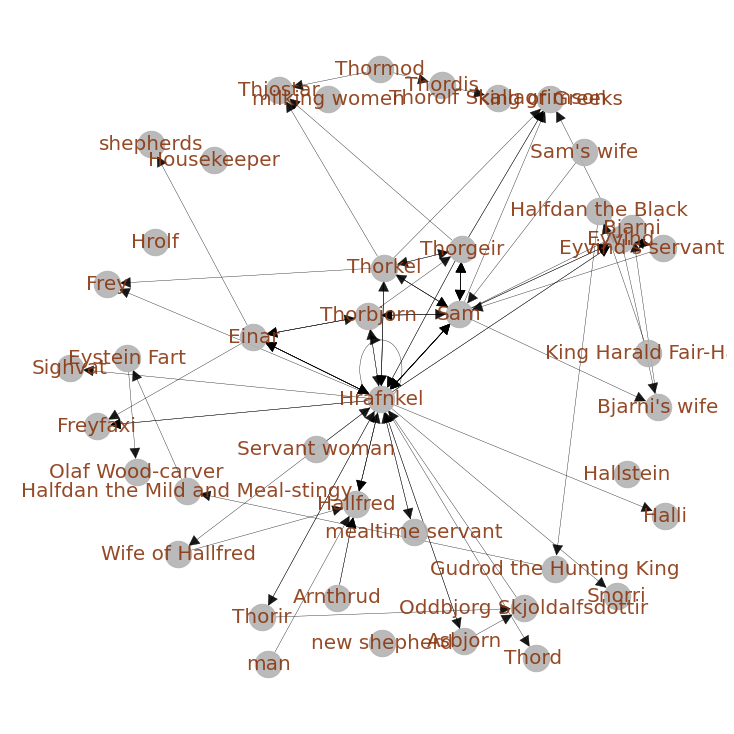

Numero nodi nel grafo:
43
-----------------------
Numero archi nel grafo:
96


In [6]:
G = nx.MultiDiGraph()

print("Numero nodi da rappresentare:")
print(len(lista_nodi))
print("-----------------------------")
print("Numero archi da rappresentare:")
print(len(lista_archi))


G.add_nodes_from(lista_nodi)

G.add_weighted_edges_from(lista_label_archi)

print("Numero nodi nel grafo:")
print(G.number_of_nodes())
print("-----------------------")
print("Numero archi nel grafo:")
print(G.number_of_edges())

spiral = nx.spiral_layout(G, resolution=2)
spring_pos = nx.spring_layout(G, seed = 10,k = 0.3, pos = spiral)
kamada = nx.kamada_kawai_layout(G, pos = spring_pos)
spring_pos = nx.spring_layout(G, seed = 110, k = 2.5, pos = kamada)


#nx.draw_networkx_nodes(G, pos = spring_pos, alpha=0.4)
#nx.draw_networkx_edges(G, pos = spring_pos, width = 0.5, arrowsize=1050)
#nx.draw_networkx(G, pos = pos, with_labels=True)
#nx.draw_networkx_labels(G, pos = spring_pos, labels=lista_label, font_size=22, font_color="whitesmoke")



plt.tight_layout()
plt.figure(3, figsize=(10, 10))
nx.draw(G, pos= spring_pos, with_labels=True,font_size=20,node_color='#B3B3B3', node_size=700,alpha= 0.9,width= 0.4, labels= lista_label,arrowsize=25, font_color ='#8A360F')
plt.show()
print("Numero nodi nel grafo:")
print(G.number_of_nodes())
print("-----------------------")
print("Numero archi nel grafo:")
print(G.number_of_edges())

In [15]:
n = G.number_of_nodes()

pos = nx.spring_layout(G,dim=3, seed=18)


numNodes = G.number_of_nodes()


    # Those two points are the extrema of the line to be plotted
for i,j in enumerate(G.edges()):
    x = np.array((pos[j[0]][0], pos[j[1]][0]))
    y = np.array((pos[j[0]][1], pos[j[1]][1]))
    z = np.array((pos[j[0]][2], pos[j[1]][2]))

for i in range(G.number_of_nodes()):
    x_prova = np.array(pos[i][0])


edge_list = G.edges()

#we  need to create lists that contain the starting and ending coordinates of each edge.
x_edges=[]
y_edges=[]
z_edges=[]

#need to fill these with all of the coordiates
for edge in edge_list:
    #format: [beginning,ending,None]
    x_coords = [pos[edge[0]][0],pos[edge[1]][0],None]
    x_edges += x_coords

    y_coords = [pos[edge[0]][1],pos[edge[1]][1],None]
    y_edges += y_coords

    z_coords = [pos[edge[0]][2],pos[edge[1]][2],None]
    z_edges += z_coords

#create a trace for the edges
trace_edges = go.Scatter3d(x=x_edges,
                        y=y_edges,
                        z=z_edges,
                        mode='lines',
                        line=dict(color='darkviolet', width=2),
                        hoverinfo='none')


#create a trace for the nodes
trace_nodes = go.Scatter3d(x=x,
                         y=y,
                        z=z,
                        mode='markers',
                        marker=dict(symbol='circle',
                                    size=10,
                                    colorscale=['lightgreen','magenta'], #either green or mageneta
                                    line=dict(color='black', width=0.5)),
                        hoverinfo='text')
axis = dict(showbackground=False,
            showline=False,
            zeroline=False,
            showgrid=False,
            showticklabels=False,
            title='')

#also need to create the layout for our plot
layout = go.Layout(title="Saga Hrafnkel",
                width=650,
                height=625,
                showlegend=False,
                scene=dict(xaxis=dict(axis),
                        yaxis=dict(axis),
                        zaxis=dict(axis),
                        ),
                margin=dict(t=100),
                hovermode='closest')

#Include the traces we want to plot and create a figure
data = [trace_edges, trace_nodes]
fig = go.Figure(data=data, layout=layout)

fig.show()

# Set the initial view
 #ax.view_init(30, 10)

# Hide the axes
#ax.set_axis_off()



KeyError: 0

In [ ]:
def network_plot_3D(G, angle, save=False):

    # Get node positions
    pos = nx.get_node_attributes(G, 'pos')

    # Get number of nodes
    n = G.number_of_nodes()

    # Get the maximum number of edges adjacent to a single node
    edge_max = max([G.degree(i) for i in range(n)])

    # Define color range proportional to number of edges adjacent to a single node
    colors = [plt.cm.plasma(G.degree(i)/edge_max) for i in range(n)]

    # 3D network plot
    with plt.style.context(('ggplot')):

        fig = plt.figure(figsize=(10,7))
        ax = Axes3D(fig)

        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        for key, value in pos.items():
            xi = value[0]
            yi = value[1]
            zi = value[2]

            # Scatter plot
            ax.scatter(xi, yi, zi, c=colors[key], s=20+20*G.degree(key), edgecolors='k', alpha=0.7)

        # Loop on the list of edges to get the x,y,z, coordinates of the connected nodes
        # Those two points are the extrema of the line to be plotted
        for i,j in enumerate(G.edges()):

            x = np.array((pos[j[0]][0], pos[j[1]][0]))
            y = np.array((pos[j[0]][1], pos[j[1]][1]))
            z = np.array((pos[j[0]][2], pos[j[1]][2]))

        # Plot the connecting lines
            ax.plot(x, y, z, c='black', alpha=0.5)

    # Set the initial view
    ax.view_init(30, angle)

    # Hide the axes
    ax.set_axis_off()

